In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

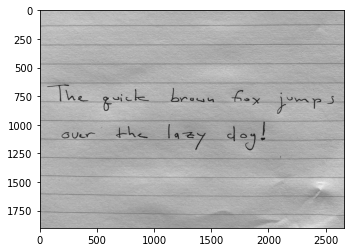

In [4]:
img = cv2.imread("images/handwritten_text.jpeg", 0)
plt.imshow(img, cmap = 'gray')

# Simple Thresholding

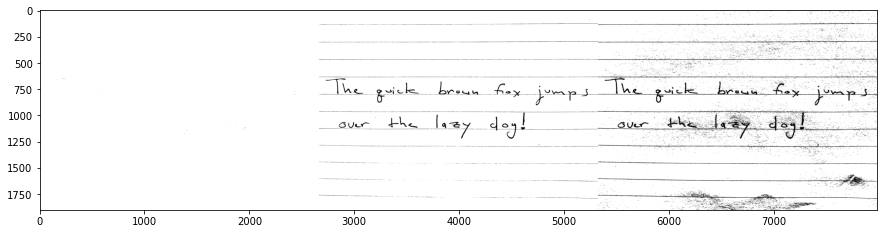

In [14]:
thresholded_img_1 = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)[1]
thresholded_img_2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
thresholded_img_3 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)[1]
final_img = np.concatenate((thresholded_img_1, thresholded_img_2, thresholded_img_3), axis = 1)
plt.figure(figsize=(15,15))
plt.imshow(final_img, cmap = 'gray')

As we can see, for normal thresholding, we'd need to tweak the parameters of the image according to our conditions. And that is not what you'd want to do as a programmer. 

# Otsu Thresholding

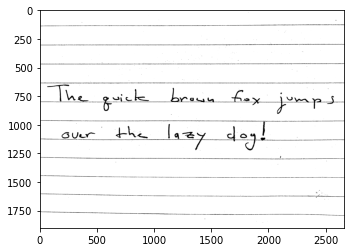

In [16]:
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap = 'gray')

This looks good but Otsu Thresholding has a problem. It is also a global thresholding and local gradients could be ignored. Of course, you could divide the image into smaller kernel sizes and implement a sliding window with otsu thresholding for getting local gradients. But that might be slow.

And In my experience I have found otsu thresholding to have Exploding Pixels problem. The case where there is an explosion of white/black pixels over the image.

# Cases where Otsu doesn't work